In [113]:
!git clone https://github.com/Atharva-Malode/ML-Bootcamp.git

fatal: destination path 'ML-Bootcamp' already exists and is not an empty directory.


In [114]:
!pip install wordcloud

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [116]:
df=pd.read_csv("/content/ML-Bootcamp/Week-3/Day-1/Dataset/SMSSpamCollection.txt",sep="\t",names=['label','text'])   #sep="\t tab separaetd value"
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [118]:
df.shape

(5572, 2)

DATA CLEANING


In [ ]:
#do want to see what is present

In [119]:
import nltk

from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
sn=SnowballStemmer("english")
stop = set(stopwords.words("english"))

In [121]:
def clean_text(sms):
  sms=sms.lower()
  sms=re.sub("[^a-z]",' ',sms)  #removes question mark
  sms=nltk.word_tokenize(sms)  # make changes to list separted
  sms=[t for t in sms if len(t)>1]   #removes single char
  sms= [sn.stem(word) for word in sms if word not in stop]   #stop the words and removes some words
  sms=' '.join(sms)   #converting big string in small string

  return sms

In [122]:
clean_text("Get this stuff for      free t playing free ????? just Rs.10 b b s")   #removes the ? mark  & numeric value doesnit make any sense

'get stuff free play free rs'

In [123]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [124]:
df['clean_text']=df['text'].apply(clean_text)

In [125]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


WORDCLOUD


In [138]:
from wordcloud import wordcloud

In [143]:
hamdata = df[df['label'] == 'ham']
hamdata = hamdata['clean_text']   #hamdata will take only clean_text or cleandata

In [144]:
def wordcloud(data):

  words= ' '.join(data)

  wc = WordCloud(background_color='white')

  wc = wc.generate(words)

  plt.figure(figsize= (10,8))

  plt.imshow(wc)

  plt.axis("off")

  plt.show()

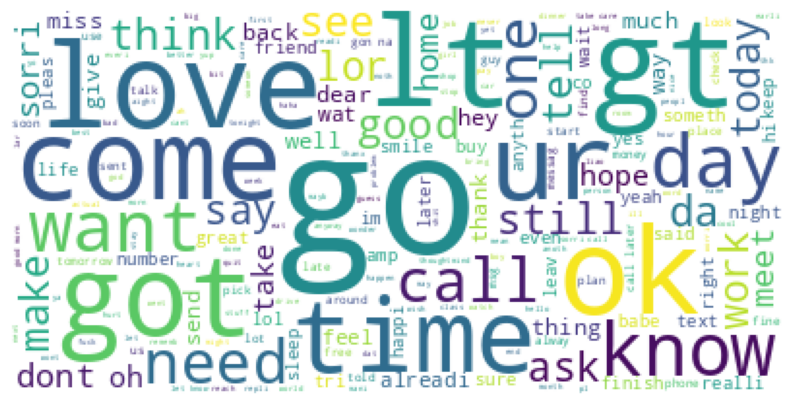

In [146]:
wordcloud(hamdata)

In [147]:
spamdata = df[df['label'] == 'spam']

spamdata = spamdata['clean_text']

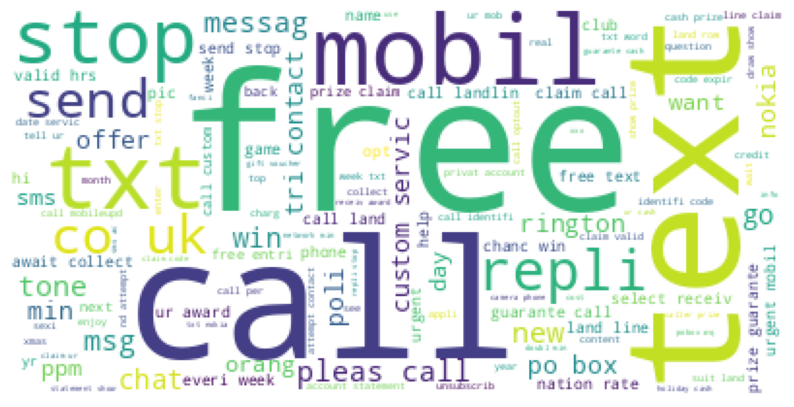

In [150]:
wordcloud(spamdata)

FEATURIZATION


In [151]:
from sklearn.feature_extraction.text import CountVectorizer

In [152]:
cv = CountVectorizer(max_features = 5000)

In [153]:
X = cv.fit_transform(df['clean_text']).toarray()

In [154]:
cv = CountVectorizer(max_features=5000)

In [155]:
pd.get_dummies(df['label'])

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [156]:
X.shape

(5572, 5000)

In [157]:
y = pd.get_dummies(df['label'])

y = y['spam'].values

In [158]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

MODEL BUILDING


In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [161]:
from sklearn.naive_bayes import MultinomialNB

In [162]:
model = MultinomialNB()


In [163]:
model.fit(X_train,y_train)

MultinomialNB()

In [164]:
y_pred = model.predict(X_test)

In [165]:
y_test,y_pred

(array([0, 1, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 1, 0, ..., 0, 0, 0], dtype=uint8))

In [166]:
pd.DataFrame({'Actual' : y_test, 'prdicted': y_pred}).head(10)

,Actual,prdicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


EVALUATION


In [167]:
print("Accuracy on Training Data :")
print(model.score(X_train,y_train))

Accuracy on Training Data :
0.990892043932494


In [168]:
print("Accuracy on Training Data :")
print(model.score(X_test,y_test))

Accuracy on Training Data :
0.9847743338771071
